In [1]:
# Import libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
# filter and making copy of df assigning to new df
df_DA_DE = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'Germany')].copy() 

In [4]:
df_DA_DE = df_DA_DE.dropna(subset=['salary_year_avg'])

df_DA_DE_exploded = df_DA_DE.explode('job_skills')

df_DA_DE_exploded[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
20066,75067.5,r
20066,75067.5,python
20066,75067.5,java
20066,75067.5,c#
20066,75067.5,sql


In [12]:
df_DA_skills = df_DA_DE_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

DA_job_count = len(df_DA_DE)

df_DA_skills['skill_percent'] = df_DA_skills['skill_count'] / DA_job_count * 100

skill_percent = 5

df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent'] > skill_percent]

df_DA_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,24,101500.0,50.000000
python,18,111175.0,37.500000
tableau,13,100500.0,27.083333
spark,7,111175.0,14.583333
r,7,75067.5,14.583333
excel,7,105650.0,14.583333
looker,5,53014.0,10.416667
power bi,4,83937.5,8.333333
go,4,52014.0,8.333333


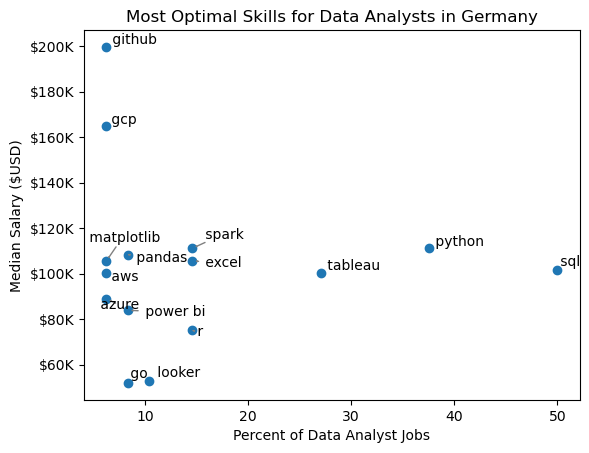

In [ ]:
from adjustText import adjust_text

plt.scatter(df_DA_skills_high_demand['skill_percent'], df_DA_skills_high_demand['median_salary'])
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Salary ($USD)')  # Assuming this is the label you want for y-axis
plt.title('Most Optimal Skills for Data Analysts in Germany')

# Get current axes, set limits, and format axes
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))  # Example formatting y-axis

# Add labels to points and collect them in a list
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], " " + txt))

# Adjust text to avoid overlap and add arrows
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

plt.show()

## Colouring by Technology

Adding color labels based on technology.

Removes duplicate entries and any rows with missing values. Then, it combines all dictionary entries into a single dictionary, summing values for keys that repeat across entries. To ensure each key's values are unique, it converts the values to a set and then back to a list. The final result is a dictionary where each key represents a skill and each value is a list of unique attributes associated with that skill.

In [16]:
df['job_type_skills'].sample(10)

200152                                   {'cloud': ['gcp']}
220673    {'analyst_tools': ['tableau'], 'cloud': ['aws'...
651840    {'analyst_tools': ['tableau', 'splunk'], 'clou...
58404     {'analyst_tools': ['tableau', 'microstrategy',...
639371    {'other': ['kubernetes'], 'programming': ['gol...
82458                                                  None
738107                             {'programming': ['sql']}
5178      {'analyst_tools': ['power bi'], 'cloud': ['azu...
510880    {'analyst_tools': ['word', 'excel', 'powerpoin...
596543    {'analyst_tools': ['tableau', 'looker'], 'clou...
Name: job_type_skills, dtype: object

In [23]:
df_technology = df['job_type_skills'].copy()
# test NaN values
# Boolean Series where True indicates NaN
nan_mask = df_technology.isna()

# Show how many and optionally list them
print(f"Number of NaN values: {nan_mask.sum()}")
nan_indices = df_technology[nan_mask].index.tolist()

# test duplicates
# Convert each value (dict or None) to a string representation
df_technology_str = df_technology.astype(str)

# Boolean Series: True for duplicates
duplicate_mask = df_technology_str.duplicated()

# Count and list of duplicates
print(f"Number of duplicates: {duplicate_mask.sum()}")
duplicate_indices = df_technology[duplicate_mask].index.tolist()


Number of NaN values: 117037
Number of duplicates: 608178


In [26]:

df_technology = df_technology.dropna()
df_technology = df_technology.drop_duplicates()

technology_dict = {}
for row in df_technology:
  row_dict = ast.literal_eval(row) # converting string to dict
  for key, value in row_dict.items():
    if key not in technology_dict:
      technology_dict[key] = value
    else:
      technology_dict[key] += value

# remove duplicates inside individual keys
for key, value in technology_dict.items():
  technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['dax',
  'tableau',
  'sheets',
  'powerbi',
  'ssrs',
  'spreadsheet',
  'splunk',
  'nuix',
  'spss',
  'datarobot',
  'outlook',
  'sap',
  'ssis',
  'word',
  'alteryx',
  'esquisse',
  'cognos',
  'microstrategy',
  'sharepoint',
  'qlik',
  'power bi',
  'excel',
  'sas',
  'looker',
  'visio',
  'powerpoint',
  'msaccess',
  'ms access'],
 'programming': ['swift',
  'mongo',
  'scala',
  'visualbasic',
  'matlab',
  'visual basic',
  'nosql',
  'c++',
  'css',
  'sql',
  'apl',
  'julia',
  'ruby',
  'sass',
  'lua',
  'python',
  'c',
  'php',
  'c#',
  'haskell',
  'html',
  'crystal',
  'assembly',
  'golang',
  'mongodb',
  'fortran',
  'delphi',
  'r',
  'powershell',
  'vb.net',
  'lisp',
  'erlang',
  'objective-c',
  'javascript',
  'clojure',
  'f#',
  'perl',
  'ocaml',
  'groovy',
  'sas',
  'pascal',
  't-sql',
  'dart',
  'bash',
  'cobol',
  'solidity',
  'rust',
  'elixir',
  'shell',
  'kotlin',
  'vba',
  'typescript',
  'go',
  'java',
  'no-

In [28]:
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])

df_technology = df_technology.explode('skills')

df_technology

,technology,skills
0,analyst_tools,dax
0,analyst_tools,tableau
0,analyst_tools,sheets
0,analyst_tools,powerbi
0,analyst_tools,ssrs
...,...,...
9,sync,mattermost
9,sync,wire
9,sync,rocketchat
9,sync,slack


In [30]:
df_DA_skills_high_demand.merge(df_technology, left_on='job_skills', right_on='skills')

,skill_count,median_salary,skill_percent,technology,skills
0,24,101500.0,50.000000,programming,sql
1,18,111175.0,37.500000,programming,python
2,13,100500.0,27.083333,analyst_tools,tableau
3,7,111175.0,14.583333,libraries,spark
4,7,75067.5,14.583333,programming,r
5,7,105650.0,14.583333,analyst_tools,excel
6,5,53014.0,10.416667,analyst_tools,looker
7,4,83937.5,8.333333,analyst_tools,power bi
8,4,52014.0,8.333333,programming,go
9,4,108412.5,8.333333,libraries,pandas


In [ ]:
from adjustText import adjust_text

plt.scatter(df_DA_skills_high_demand['skill_percent'], df_DA_skills_high_demand['median_salary'])
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Salary ($USD)')  # Assuming this is the label you want for y-axis
plt.title('Most Optimal Skills for Data Analysts in Germany')

# Get current axes, set limits, and format axes
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))  # Example formatting y-axis

# Add labels to points and collect them in a list
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], " " + txt))

# Adjust text to avoid overlap and add arrows
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

plt.show()